In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error

In [2]:
df = pd.read_csv('appl_1980_2014.csv')

In [3]:
df.shape

(8465, 7)

In [4]:
df.head()

,Date,Open,High,Low,Close,Volume,Adj Close
0,2014-07-08,96.27,96.80,93.92,95.35,65130000,95.35
1,2014-07-07,94.14,95.99,94.10,95.97,56305400,95.97
2,2014-07-03,93.67,94.10,93.20,94.03,22891800,94.03
3,2014-07-02,93.87,94.06,93.09,93.48,28420900,93.48
4,2014-07-01,93.52,94.07,93.13,93.52,38170200,93.52


In [5]:
df['Date'] = pd.to_datetime(df['Date'])

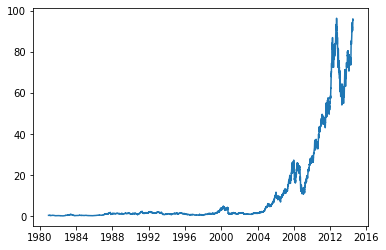

In [6]:
plt.plot(df['Date'], df['Adj Close'])
plt.show()

In [26]:
X = df.iloc[:, 1:5].values
y = df.iloc[:, -1].values

In [8]:
y = y.reshape(-1,1)

In [9]:
sc = StandardScaler()
X = sc.fit_transform(X)
y = sc.fit_transform(y)

In [10]:
X.shape

(8465, 4)

In [11]:
n = len(X)

In [12]:
X[:5]

array([[-0.01637063, -0.02129753, -0.02352917, -0.0225504 ],
       [-0.03137518, -0.02695604, -0.0222484 , -0.01818016],
       [-0.03468604, -0.04015924, -0.02865227, -0.03185476],
       [-0.03327717, -0.04043867, -0.02943496, -0.03573158],
       [-0.0357427 , -0.04036881, -0.02915035, -0.03544963]])

In [13]:
# x = [x0, x1, x2, x3, x4]

In [14]:
x0 = np.ones(n)

In [15]:
X = np.c_[x0, X]

In [16]:
X[:5]

array([[ 1.        , -0.01637063, -0.02129753, -0.02352917, -0.0225504 ],
       [ 1.        , -0.03137518, -0.02695604, -0.0222484 , -0.01818016],
       [ 1.        , -0.03468604, -0.04015924, -0.02865227, -0.03185476],
       [ 1.        , -0.03327717, -0.04043867, -0.02943496, -0.03573158],
       [ 1.        , -0.0357427 , -0.04036881, -0.02915035, -0.03544963]])

In [17]:
X.shape

(8465, 5)

In [27]:
newX = []
newX.append(x0)

for i in range(X.shape[1]):
    newX.append(X[:,i])

In [28]:
newX = np.array(newX)

In [29]:
newX.shape

(5, 8465)

In [30]:
newX = newX.T

In [31]:
newX.shape

(8465, 5)

In [32]:
theta = np.zeros(5)

In [33]:
def cost_function(x,y,theta):
    n = len(x)
    error = (sum((np.dot(x,theta) - y) ** 2)) / n
    return error

In [34]:
cost_function(newX, y, theta)

569.6509136325972

In [38]:
def gradient_descent(x, y, theta, epochs, alpha):
    n = len(x)
    cost_history = [0] * epochs
    for i in range(epochs):
        pred = np.dot(x,theta)
        error = pred - y
        grad_slope = (2/n) * error.T.dot(x)
        theta = theta - grad_slope * alpha
        cost_history[i] = cost_function(x,y,theta)
        #print(cost_history[i], slope, inter)
    return theta, cost_history

In [39]:
epochs = 200
alpha = 0.01
theta, error = gradient_descent(newX,y,theta,epochs,alpha)

<ipython-input-33-3d472d5b6860>:3: RuntimeWarning: overflow encountered in double_scalars
  error = (sum((np.dot(x,theta) - y) ** 2)) / n
<ipython-input-33-3d472d5b6860>:3: RuntimeWarning: overflow encountered in square
  error = (sum((np.dot(x,theta) - y) ** 2)) / n
<ipython-input-38-8862fb6f7119>:8: RuntimeWarning: invalid value encountered in subtract
  theta = theta - grad_slope * alpha


In [40]:
theta

array([nan, nan, nan, nan, nan])